# Notebook for plotting seasonal spatial climatologies for WRF HIST and mid, end-FUTR data

### Import necessary libraries (NetCDF4 for working with .nc files, xarray for opening .nc files, statistics for stats computations, cartopy for plotting)

In [11]:
import numpy as np
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

## Open mid, end-FUTR files containing seasonal max ≥ 1 in [2.54 cm] hail and ≥ 1.57 [4 cm] in hail

### Start with files containing only sev

In [12]:
mid4p5_seasonal_DJF_sev = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/mid-FUTR/mid4p5_DJF_seasonal_sev_max.nc')
mid4p5_seasonal_MAM_sev = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/mid-FUTR/mid4p5_MAM_seasonal_sev_max.nc')
mid4p5_seasonal_JJA_sev = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/mid-FUTR/mid4p5_JJA_seasonal_sev_max.nc')
mid4p5_seasonal_SON_sev = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/mid-FUTR/mid4p5_SON_seasonal_sev_max.nc')

mid8p5_seasonal_DJF_sev = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/mid-FUTR/mid8p5_DJF_seasonal_sev_max.nc')
mid8p5_seasonal_MAM_sev = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/mid-FUTR/mid8p5_MAM_seasonal_sev_max.nc')
mid8p5_seasonal_JJA_sev = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/mid-FUTR/mid8p5_JJA_seasonal_sev_max.nc')
mid8p5_seasonal_SON_sev = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/mid-FUTR/mid8p5_SON_seasonal_sev_max.nc')

# Repeat for end-FUTR

end4p5_seasonal_DJF_sev = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/end-FUTR/end4p5_DJF_seasonal_sev_max.nc')
end4p5_seasonal_MAM_sev = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/end-FUTR/end4p5_MAM_seasonal_sev_max.nc')
end4p5_seasonal_JJA_sev = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/end-FUTR/end4p5_JJA_seasonal_sev_max.nc')
end4p5_seasonal_SON_sev = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/end-FUTR/end4p5_SON_seasonal_sev_max.nc')

end8p5_seasonal_DJF_sev = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/end-FUTR/end8p5_DJF_seasonal_sev_max.nc')
end8p5_seasonal_MAM_sev = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/end-FUTR/end8p5_MAM_seasonal_sev_max.nc')
end8p5_seasonal_JJA_sev = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/end-FUTR/end8p5_JJA_seasonal_sev_max.nc')
end8p5_seasonal_SON_sev = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/end-FUTR/end8p5_SON_seasonal_sev_max.nc')

## Select values of HAIL_MAX2D to create plottable array

In [13]:
mid4p5_seasonal_DJF_sev = mid4p5_seasonal_DJF_sev.HAIL_MAX2D
mid4p5_seasonal_MAM_sev = mid4p5_seasonal_MAM_sev.HAIL_MAX2D
mid4p5_seasonal_JJA_sev = mid4p5_seasonal_JJA_sev.HAIL_MAX2D
mid4p5_seasonal_SON_sev = mid4p5_seasonal_SON_sev.HAIL_MAX2D

mid8p5_seasonal_DJF_sev = mid8p5_seasonal_DJF_sev.HAIL_MAX2D
mid8p5_seasonal_MAM_sev = mid8p5_seasonal_MAM_sev.HAIL_MAX2D
mid8p5_seasonal_JJA_sev = mid8p5_seasonal_JJA_sev.HAIL_MAX2D
mid8p5_seasonal_SON_sev = mid8p5_seasonal_SON_sev.HAIL_MAX2D

# **These are plotting variables**

end4p5_seasonal_DJF_sev = end4p5_seasonal_DJF_sev.HAIL_MAX2D
end4p5_seasonal_MAM_sev = end4p5_seasonal_MAM_sev.HAIL_MAX2D
end4p5_seasonal_JJA_sev = end4p5_seasonal_JJA_sev.HAIL_MAX2D
end4p5_seasonal_SON_sev = end4p5_seasonal_SON_sev.HAIL_MAX2D

end8p5_seasonal_DJF_sev = end8p5_seasonal_DJF_sev.HAIL_MAX2D
end8p5_seasonal_MAM_sev = end8p5_seasonal_MAM_sev.HAIL_MAX2D
end8p5_seasonal_JJA_sev = end8p5_seasonal_JJA_sev.HAIL_MAX2D
end8p5_seasonal_SON_sev = end8p5_seasonal_SON_sev.HAIL_MAX2D

### Repeat for files containing ≥ 4 cm criteria

In [31]:
mid4p5_seasonal_DJF_4cm = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/mid-FUTR/mid4p5_DJF_seasonal_4cm_max.nc')
mid4p5_seasonal_MAM_4cm = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/mid-FUTR/mid4p5_MAM_seasonal_4cm_max.nc')
mid4p5_seasonal_JJA_4cm = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/mid-FUTR/mid4p5_JJA_seasonal_4cm_max.nc')
mid4p5_seasonal_SON_4cm = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/mid-FUTR/mid4p5_SON_seasonal_4cm_max.nc')

mid8p5_seasonal_DJF_4cm = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/mid-FUTR/mid8p5_DJF_seasonal_4cm_max.nc')
mid8p5_seasonal_MAM_4cm = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/mid-FUTR/mid8p5_MAM_seasonal_4cm_max.nc')
mid8p5_seasonal_JJA_4cm = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/mid-FUTR/mid8p5_JJA_seasonal_4cm_max.nc')
mid8p5_seasonal_SON_4cm = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/mid-FUTR/mid8p5_SON_seasonal_4cm_max.nc')

# Repeat for end-FUTR

end4p5_seasonal_DJF_4cm = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/end-FUTR/end4p5_DJF_seasonal_4cm_max.nc')
end4p5_seasonal_MAM_4cm = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/end-FUTR/end4p5_MAM_seasonal_4cm_max.nc')
end4p5_seasonal_JJA_4cm = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/end-FUTR/end4p5_JJA_seasonal_4cm_max.nc')
end4p5_seasonal_SON_4cm = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/end-FUTR/end4p5_SON_seasonal_4cm_max.nc')

end8p5_seasonal_DJF_4cm = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/end-FUTR/end8p5_DJF_seasonal_4cm_max.nc')
end8p5_seasonal_MAM_4cm = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/end-FUTR/end8p5_MAM_seasonal_4cm_max.nc')
end8p5_seasonal_JJA_4cm = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/end-FUTR/end8p5_JJA_seasonal_4cm_max.nc')
end8p5_seasonal_SON_4cm = xr.open_dataset('/home/scratch/jgoodin/seasonal_mesh_climos/end-FUTR/end8p5_SON_seasonal_4cm_max.nc')

## Select values of HAIL_MAX2D to create plottable array

In [32]:
mid4p5_seasonal_DJF_4cm = mid4p5_seasonal_DJF_4cm.HAIL_MAX2D
mid4p5_seasonal_MAM_4cm = mid4p5_seasonal_MAM_4cm.HAIL_MAX2D
mid4p5_seasonal_JJA_4cm = mid4p5_seasonal_JJA_4cm.HAIL_MAX2D
mid4p5_seasonal_SON_4cm = mid4p5_seasonal_SON_4cm.HAIL_MAX2D

mid8p5_seasonal_DJF_4cm = mid8p5_seasonal_DJF_4cm.HAIL_MAX2D
mid8p5_seasonal_MAM_4cm = mid8p5_seasonal_MAM_4cm.HAIL_MAX2D
mid8p5_seasonal_JJA_4cm = mid8p5_seasonal_JJA_4cm.HAIL_MAX2D
mid8p5_seasonal_SON_4cm = mid8p5_seasonal_SON_4cm.HAIL_MAX2D

# **These are plotting variables**

end4p5_seasonal_DJF_4cm = end4p5_seasonal_DJF_4cm.HAIL_MAX2D
end4p5_seasonal_MAM_4cm = end4p5_seasonal_MAM_4cm.HAIL_MAX2D
end4p5_seasonal_JJA_4cm = end4p5_seasonal_JJA_4cm.HAIL_MAX2D
end4p5_seasonal_SON_4cm = end4p5_seasonal_SON_4cm.HAIL_MAX2D

end8p5_seasonal_DJF_4cm = end8p5_seasonal_DJF_4cm.HAIL_MAX2D
end8p5_seasonal_MAM_4cm = end8p5_seasonal_MAM_4cm.HAIL_MAX2D
end8p5_seasonal_JJA_4cm = end8p5_seasonal_JJA_4cm.HAIL_MAX2D
end8p5_seasonal_SON_4cm = end8p5_seasonal_SON_4cm.HAIL_MAX2D

## Open relevant dataset (seasonal min, mean, or max)- contains 4 seasons of min, mean, or max values grouped across entire HIST (1990-2005) period

In [ ]:
#seasonal_max = xr.open_dataset('/home/scratch/jgoodin/seasonal_resamples/WRF_seasonal_max_resample.nc') #Open .nc file from scratch directory- change file 
#depending on variable being plotted, e.g., min, mean, max
#seasonal_max #Print out datset- make sure 4 seasons are returned

## Select only values that meet sev criteria (1 in [2.54 cm])

In [ ]:
#seasonal_max = seasonal_max.where(seasonal_max >= 1)

### Select values that meet ≥ 4 cm criteria

In [ ]:
#seasonal_max_4cm = seasonal_max.where(seasonal_max >= 1.5748)

In [ ]:
#seasonal_max_4cm.sel(season = 'MAM').HAIL_MAX2D.plot() #Test plot one season of data- check for nan values or empty dataset

## Select HAIL_MAX2D values by season (DJF, MAM, JJA, SON) for plotting

In [ ]:
#mesh = seasonal_max.sel(season = 'SON').HAIL_MAX2D #Create variable mesh and select season = DJF, MAM, JJA, SON. This will be the plotting variable
mesh_4cm = seasonal_max_4cm.sel(season = 'SON').HAIL_MAX2D #Create variable mesh_4cm and select season = DJF, MAM, JJA, SON. This will be the plotting variable

### Save results for each season to netcdf

In [ ]:
#mesh.to_netcdf('/home/scratch/jgoodin/seasonal_mesh_climos/HIST/SON_max_results.nc')
mesh_4cm.to_netcdf('/home/scratch/jgoodin/seasonal_mesh_climos/HIST/SON_4cm_results.nc')

## Import relevant statistical datasets containing standard deviation for 12 months grouped across entire HIST dataset

In [ ]:
stdev_hail = xr.open_dataset('/home/scratch/jgoodin/seasonal_resamples/WRF_seasonal_stdev_resample.nc') #Open .nc file from scratch directory
stdev_hail #Print out dataset- returns 4 seasons

### NOTE: Units of standard deviation are the same as the data [HAIL_MAX2D; in]. Values are squared (square root of variance), with higher values (in inches) representing a higher variance (spread) in the data

In [ ]:
stdev_hail.sel(season = "MAM").HAIL_MAX2D.plot() #Test plot one season- dataset check, check if stdev values seem reasonable

## Select stdev HAIL_MAX2D values for plotting

In [ ]:
stdev_plot = stdev_hail.sel(season = "SON").HAIL_MAX2D #Create variable stdev_hail and select by season for plotting- same process as used above

### Import netcdf file containing lat/lon coords for WRF files (use this for plotting)

In [33]:
coords = xr.open_dataset('lat_lon.nc') #Open .nc file containing WRF lat/lon coords

### Assign lat/lon coords from file to variables

#### Lat/lon coords contained a third dimension equal to 1, we want to get rid of this and ensure data is 2D

In [34]:
lats = coords.CLAT.values[0, :, :]
lons = coords.CLONG.values[0, :, :]

## Plot data on map of CONUS (use same map, switch plotting variables)

### Use cartopy's shapefile reader and "add_feature" tools to add land, ocean, lake polygons; state border, coastline line features

/anaconda3/envs/pyEAE/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


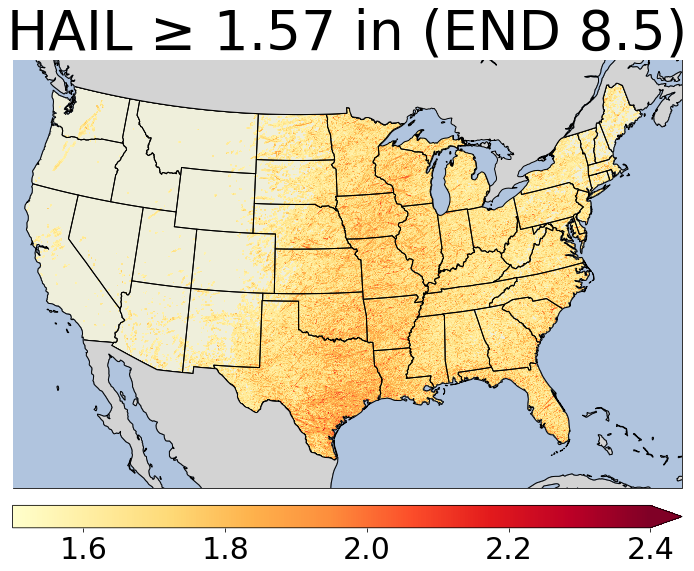

In [53]:
fig = plt.figure(figsize= (12,8)) #Plot a figure
gs1 = gridspec.GridSpec(2, 1, width_ratios = [3], height_ratios=[1, .05], bottom=.05, top=.95, wspace=.1)
map_proj = ccrs.LambertConformal(central_longitude = -100, central_latitude = 35) #Set projection, central lat/lon
ax = plt.subplot(projection = map_proj)
#ax.set_title('Maximum diameter hail for 2005', fontsize = 22)
ax.add_feature(cfeature.LAND.with_scale('10m')) #Add land
countries_shp = shpreader.natural_earth(resolution='50m',
                                     category='cultural',
                                     name='admin_0_countries')
for country, info in zip(shpreader.Reader(countries_shp).geometries(), 
                             shpreader.Reader(countries_shp).records()):
        if info.attributes['NAME_LONG'] != 'United States':

            ax.add_geometries([country], ccrs.PlateCarree(),
                             facecolor='lightgrey', edgecolor='k', zorder=6)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='k', 
                                                facecolor='None'), zorder=8) 
ax.add_feature(cfeature.BORDERS.with_scale('10m')) #Add state borders
ax.add_feature(cfeature.STATES.with_scale('10m'), facecolor = 'none') #Add US states
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', 
                                                facecolor='lightsteelblue'), zorder=6)
lakes_shp = shpreader.natural_earth(resolution='50m',
                                     category='physical',
                                     name='lakes')
for lake, info in zip(shpreader.Reader(lakes_shp).geometries(), 
                             shpreader.Reader(lakes_shp).records()):
        name = info.attributes['name']
        if name == 'Lake Superior' or name == 'Lake Michigan' or \
           name == 'Lake Huron' or name == 'Lake Erie' or name == 'Lake Ontario':
            
            ax.add_geometries([lake], ccrs.PlateCarree(),
                             facecolor='lightsteelblue', edgecolor='k', zorder=6)
ax.set_extent([240,287,22,50]) #Set lat/lon boundaries
lrFig = ax.pcolormesh(lons, lats, end8p5_seasonal_SON_4cm, vmin = 1.5, vmax = 2.4, cmap = 'YlOrRd', transform = ccrs.PlateCarree())
#ax.text(-126, 31, 'SON', fontsize = 62, va='bottom', ha='center', rotation='vertical', transform=ccrs.PlateCarree())
#gls = ax.gridlines(draw_labels=True, dms = True, x_inline=False, y_inline=False, color="black", linestyle="dotted", zorder = 10)
#gls.top_labels=False
#gls.right_labels=False
#gls.xlabel_style = {'size': 18, 'rotation': 0}
#gls.xpadding = 12.0
#gls.ylabel_style = {'size': 18}
plt.title("HAIL ≥ 1.57 in (END 8.5)", fontsize = 55)
ax1 = plt.subplot(gs1[1, 0])
cb = plt.colorbar(lrFig, cax = ax1, ticks = [1.6, 1.8, 2, 2.2, 2.4], orientation = 'horizontal', extend = 'max')
#cb.set_label('Days', fontsize = 30)
cb.ax.tick_params(labelsize = 30)
plt.subplots_adjust(bottom=0.1)
plt.savefig('/home/scratch/jgoodin/seasonal_mesh_climos/max/end8p5_4cm_SON_max.png')